# Prediciendo la diabetes
Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

## Contenido del proyecto

### EDA
* [0. Importar librerias](#c0)
* [1. Cargar el conjunto de datos](#c1)
* [2. Limpieza de datos](#c2)
    * [2.1 Identificar las variables](#s21)
    * [2.2 Identificar duplicados y valores nulos](#s22)
    * [2.3 Eliminar información irrelevante](#s23)
* [3. Análisis Univariante](#c3)
    * [3.1 Análisis categórico](#s31)
    * [3.2 Análisis numérico](#s32) 
* [4. Análisis Multivariante](#c4)
    * [4.1 Análisis Categórico-Categórico](#s41)
    * [4.2 Análisis Numérico-Numérico](#s42)
    * [4.3 Combinaciones de clase con predictoras](#s43)
    * [4.4 Análisis de correlaciones](#s44)
* [5. Ingeniería de características](#c5)
    * [5.1 Valores atípicos](#s51)
    * [5.2 Análisis de valores faltantes](#s52)
* [6. Escalado de valores](#c6)
    * [6.1 Normalización](#s61)
    * [6.2 Escalado Min-Max](#s62)
### Machine Learning 
* [7.1 Árbol de decisión](#s71)
* [7.2 Optimización de hiperparámetros](#s72)

### 0. Importar las librerias

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import json
from pickle import dump

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 1. Cargar el conjunto de datos

In [2]:
total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Limpieza de datos

#### 2.1 Identificar las variables

- ***Pregnancies***. Número de embarazos del paciente (numérico)
- ***Glucose***. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- ***BloodPressure***. Presión arterial diastólica (medida en mm Hg) (numérico)
- ***SkinThickness***. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- ***Insulin***. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- ***BMI***. Índice de masa corporal (numérico)
- ***DiabetesPedigreeFunction***. Función de pedigrí de diabetes (numérico)
- ***Age***. Edad del paciente (numérico)
- ***Outcome***. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

#### 2.2 Identificar duplicados y valores nulos

In [3]:
total_data_n = total_data.drop_duplicates()
print ("Antes:", total_data.shape)
print ("Después:", total_data_n.shape)

Antes: (768, 9)
Después: (768, 9)


No existe ningún valor duplicado.

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Tampoco existe ningún valor nulo.

#### 2.3 Eliminar información irrelevante

Ya que no hay tanto ningún valor nulo como duplicados, no vamos a eliminar nada del Dataframe.

### 3. Análisis univariante

#### 3.1 Análisis categórico

Como no hay ningún valo categórico, no hay que hacer un análisis categórico.

#### 3.2 Análisis numérico

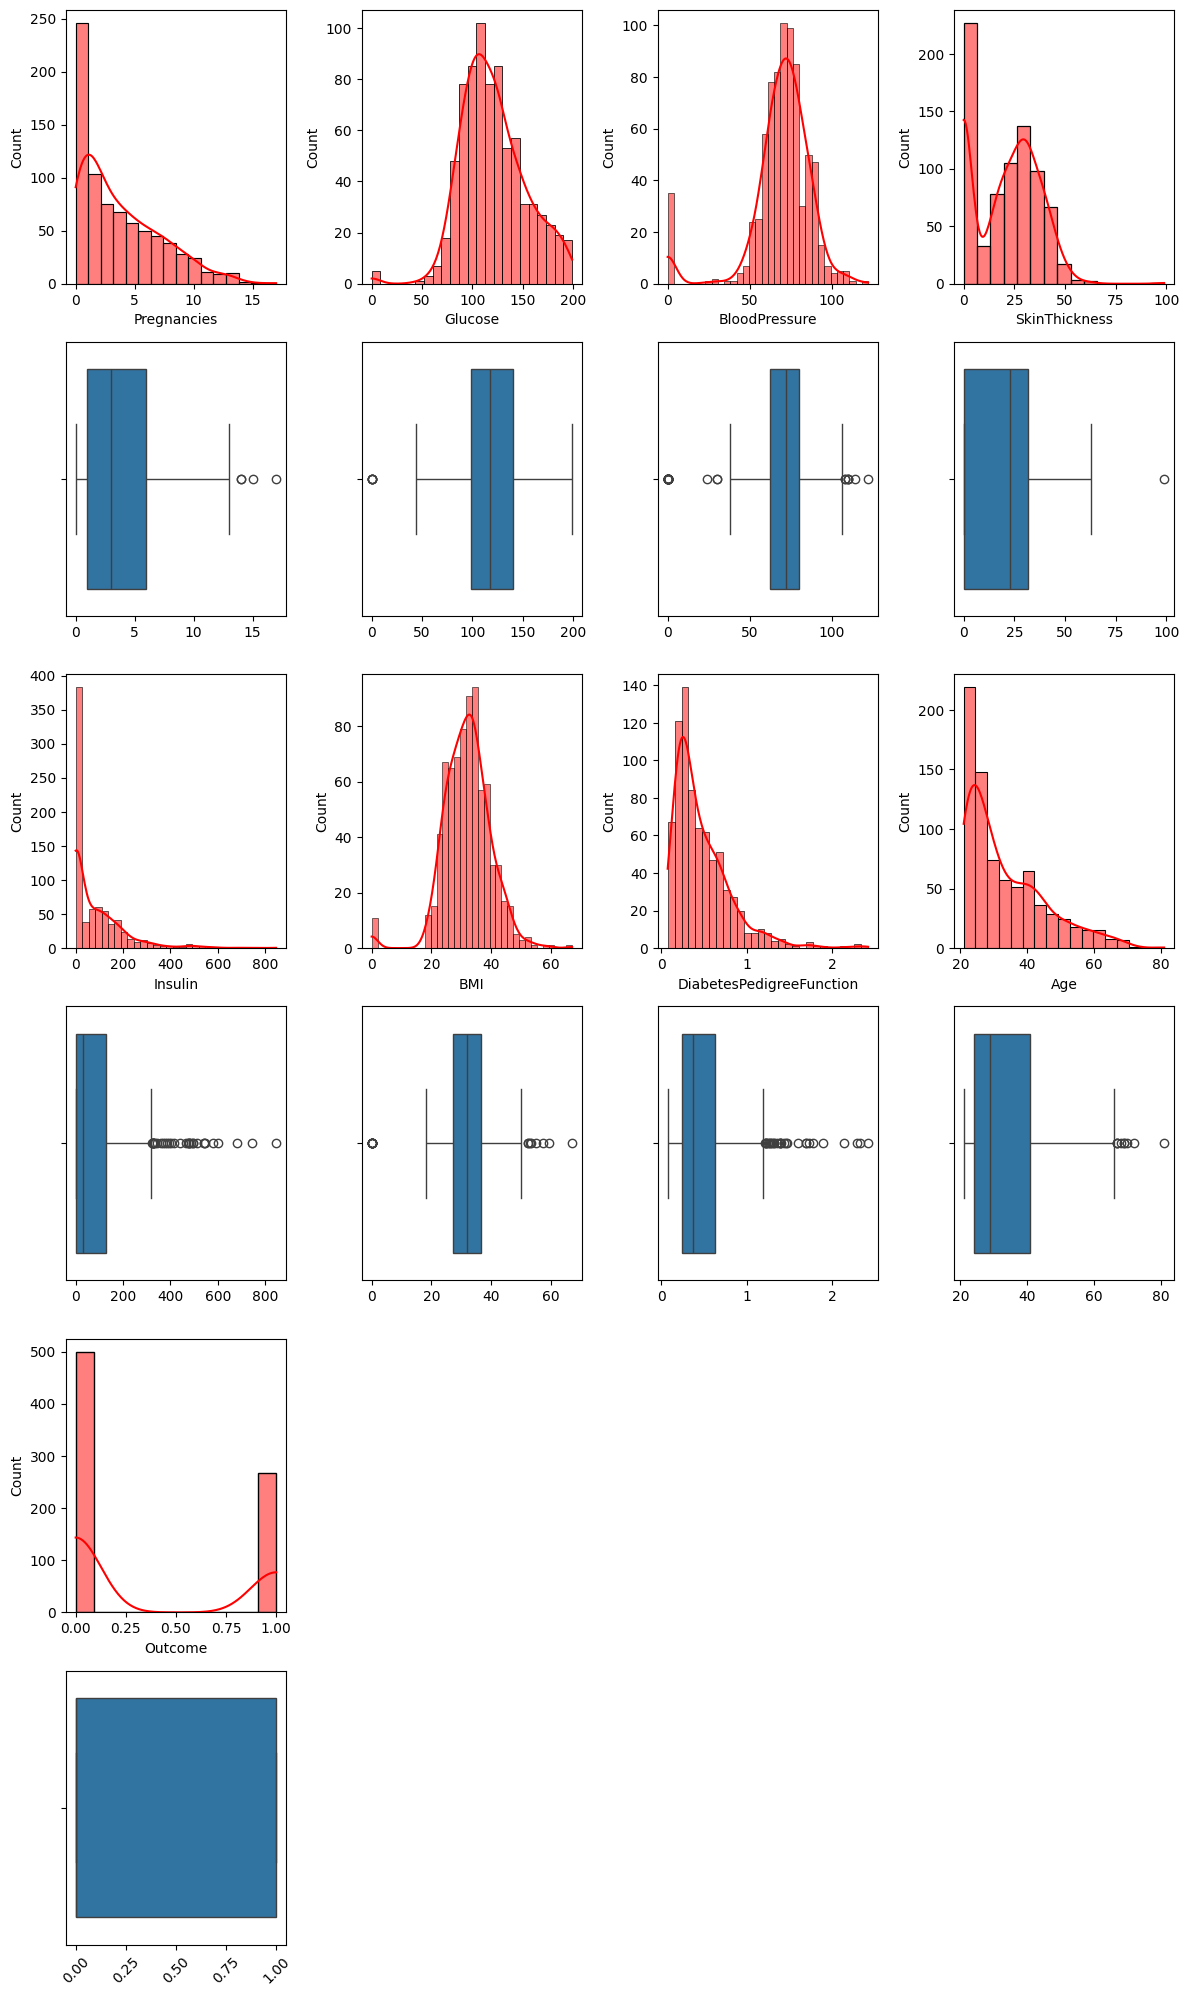

In [5]:
fig, axis = plt.subplots(6, 4, figsize=(12, 20))

sns.histplot(ax = axis[0,0], data = total_data, x = 'Pregnancies', kde = True, color = 'red')
sns.boxplot(ax = axis[1,0], data = total_data, x = 'Pregnancies').set(xlabel = None)

sns.histplot(ax = axis[0,1], data = total_data, x = 'Glucose', kde = True, color = 'red')
sns.boxplot(ax = axis[1,1], data = total_data, x = 'Glucose').set(xlabel = None)

sns.histplot(ax = axis[0,2], data = total_data, x = 'BloodPressure', kde = True, color = 'red')
sns.boxplot(ax = axis[1,2], data = total_data, x = 'BloodPressure').set(xlabel = None)

sns.histplot(ax = axis[0,3], data = total_data, x = 'SkinThickness', kde = True, color = 'red')
sns.boxplot(ax = axis[1,3], data = total_data, x = 'SkinThickness').set(xlabel = None)

sns.histplot(ax = axis[2,0], data = total_data, x = 'Insulin', kde = True, color = 'red')
sns.boxplot(ax = axis[3,0], data = total_data, x = 'Insulin').set(xlabel = None)

sns.histplot(ax = axis[2,1], data = total_data, x = 'BMI', kde = True, color = 'red')
sns.boxplot(ax = axis[3,1], data = total_data, x = 'BMI').set(xlabel = None)

sns.histplot(ax = axis[2,2], data = total_data, x = 'DiabetesPedigreeFunction', kde = True, color = 'red')
sns.boxplot(ax = axis[3,2], data = total_data, x = 'DiabetesPedigreeFunction').set(xlabel = None)

sns.histplot(ax = axis[2,3], data = total_data, x = 'Age', kde = True, color = 'red')
sns.boxplot(ax = axis[3,3], data = total_data, x = 'Age').set(xlabel = None)

sns.histplot(ax = axis[4,0], data = total_data, x = 'Outcome', kde = True, color = 'red')
sns.boxplot(ax = axis[5,0], data = total_data, x = 'Outcome').set(xlabel = None)

fig.delaxes(axis[4,1])
fig.delaxes(axis[4,2])
fig.delaxes(axis[4,3])
fig.delaxes(axis[5,1])
fig.delaxes(axis[5,2])
fig.delaxes(axis[5,3])

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

- ***Pregnancies***: Predominan los 0 embarazos, yendo descendentemente hasta máximo los 13 embarazos.
- ***Glucose***: la concentración de glucosa ronda entre los 80 y los 150 mayoritariamente.
- ***BloodPressure***: la presión arterial se encuentra en gran medida entre 60 y 90.
- ***SkinThickness***: el grosor del pliegue cutáneo se encuentra en su mayoría en 0mm, aunque la media debería rondar los 20mm
- ***Insulin***: en relación a los valores de insulina, la cifra mínima es 0 siendo la más común. El resto de valores se mueven hasta los 300 aproximadamente. Se pueden observar multitud de Outliers.
- ***BMI***: cómo puede ser observado, el índice de masa corporal ronda entre el 18% y el 50%, estando la mayoria de los casos entre el 25% y el 40%. Tiene varios Outliers por encima del bigote superior y uno unicamente por debajo del inferior,
- ***DiabetesPedigreeFunction***: valores que se mueven entre 0.0 y 1.5 en su mayoría. Hay una gran cantidad de Outliers por encima del bigote superior.
- ***Age*** : Se puede observar que es un estudio con pacientes generalmente jovenes, siendo la mínima edad 20 años y la máxima 80, pero encontrando la mayorá en edades más bajas. Los Outliers se encuentran por encima del bigote superior
- ***Outcome*** : hay prácticamente el doble de pacientes con diabetes que sin diabetes. Éste valor será nuestra Target.

### 4 Análisis Multivariante

#### 4.1 Análisis Categórico-Categórico

Cómo se ha dicho previamente, al no haber variables categóricas, este análisis no se puede realizar.

#### 4.2 Análisis Numérico-Numérico

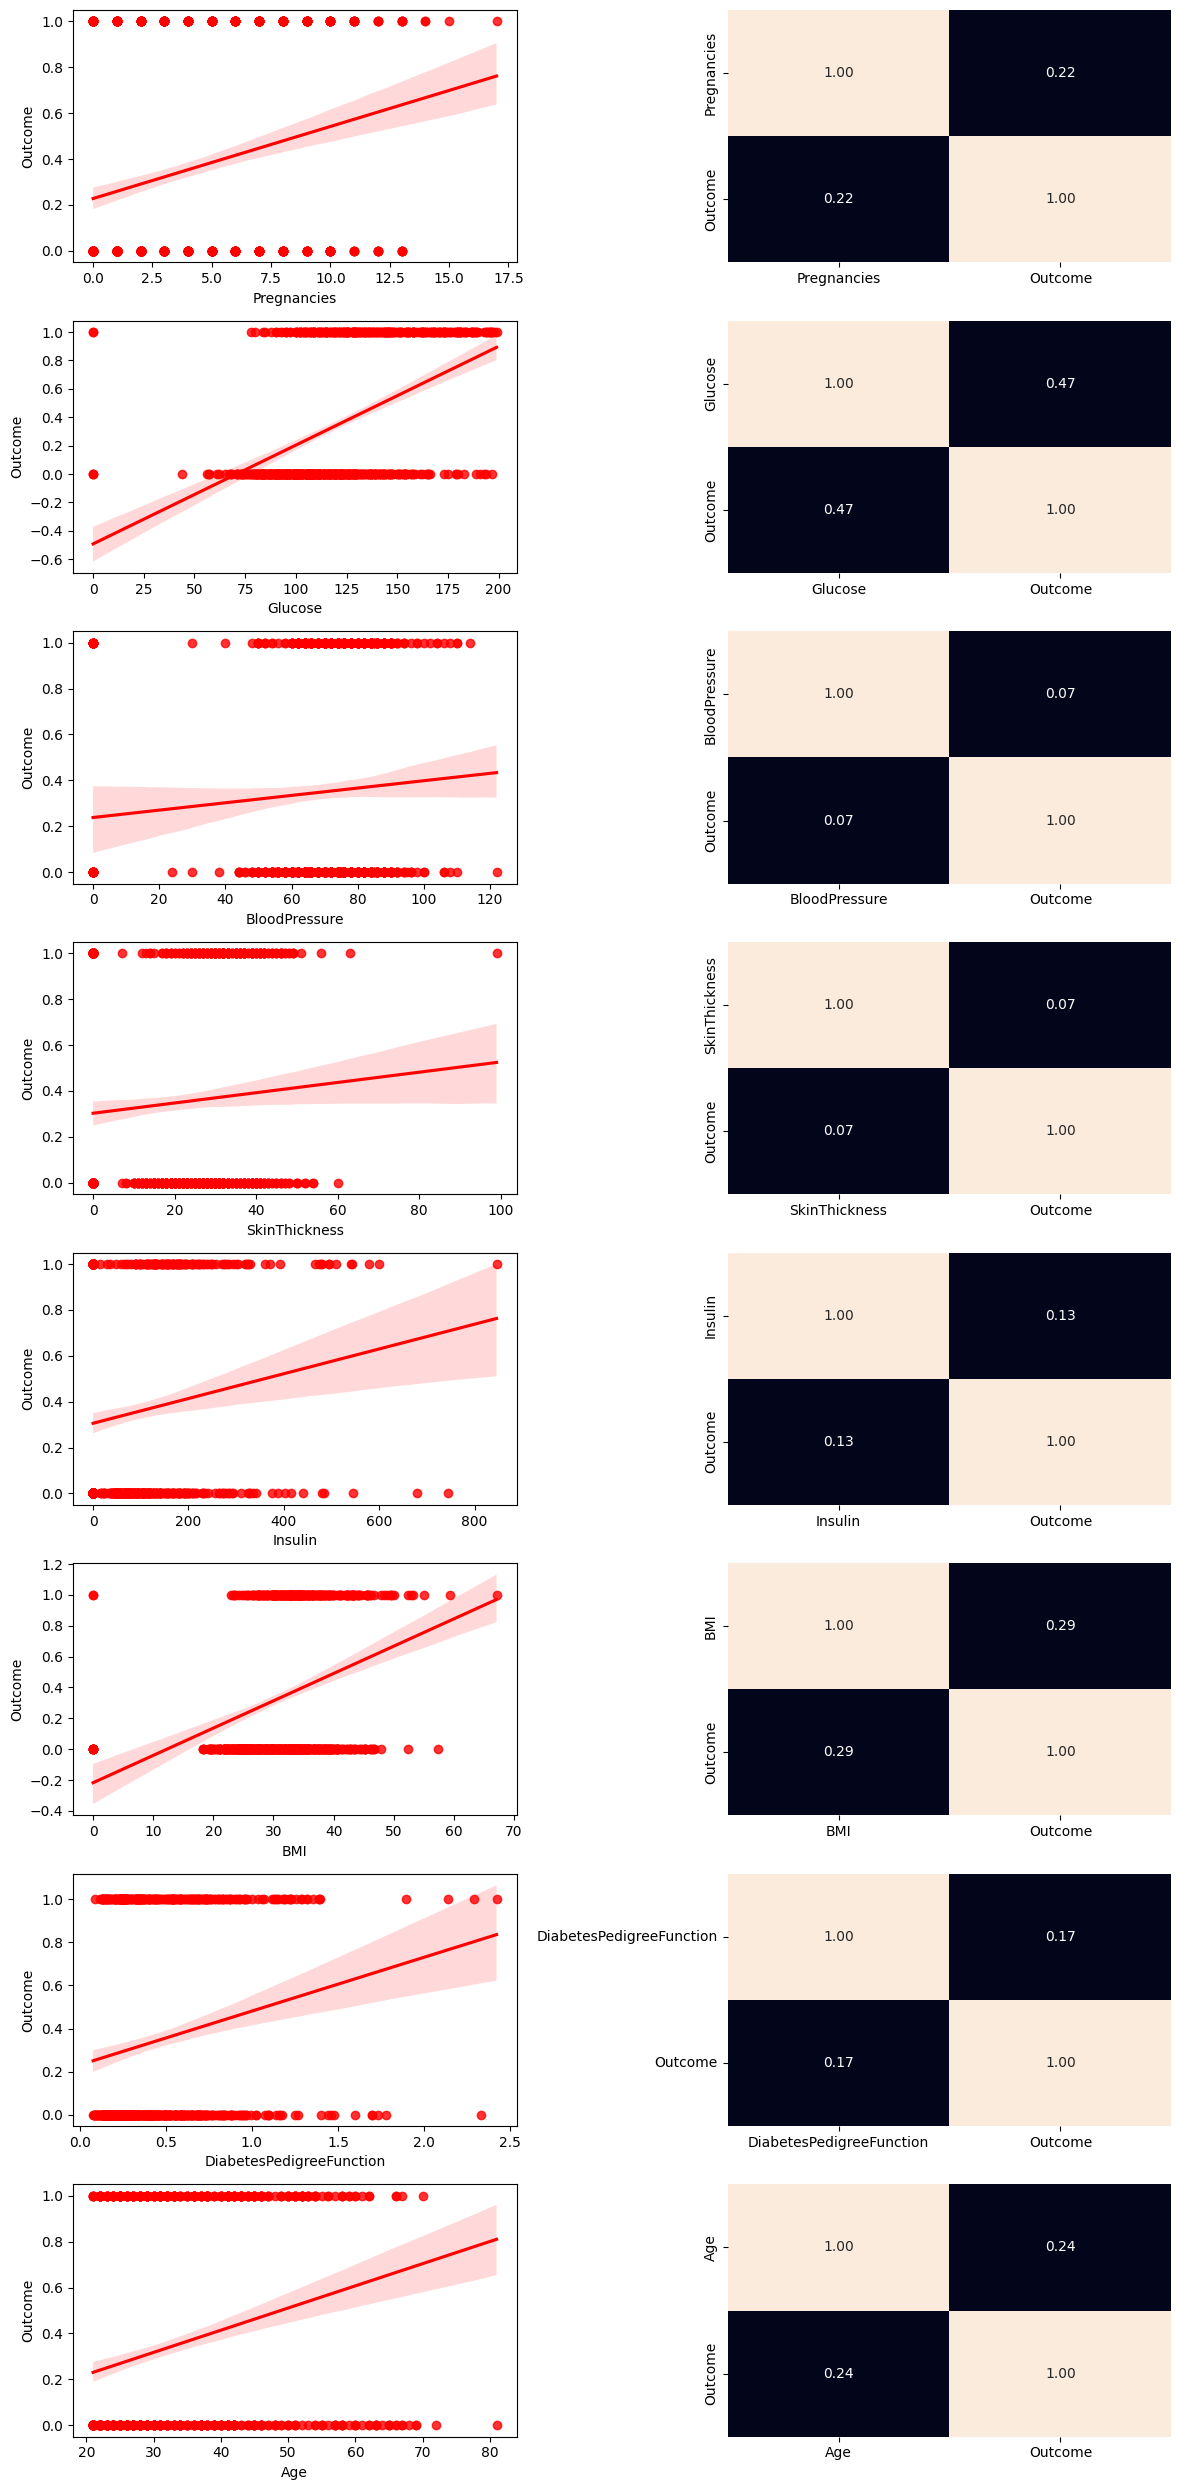

In [6]:
fig, axis = plt.subplots(8, 2, figsize=(12, 25))

sns.regplot(ax=axis[0, 0], data=total_data, x="Pregnancies", y="Outcome", color = 'red')
sns.heatmap(total_data[["Pregnancies", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)

sns.regplot(ax=axis[1, 0], data=total_data, x="Glucose", y="Outcome", color = 'red')
sns.heatmap(total_data[["Glucose", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(ax=axis[2, 0], data=total_data, x="BloodPressure", y="Outcome", color = 'red')
sns.heatmap(total_data[["BloodPressure", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

sns.regplot(ax=axis[3, 0], data=total_data, x="SkinThickness", y="Outcome", color = 'red')
sns.heatmap(total_data[["SkinThickness", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(ax=axis[4, 0], data=total_data, x="Insulin", y="Outcome", color = 'red')
sns.heatmap(total_data[["Insulin", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[4, 1], cbar=False)

sns.regplot(ax=axis[5, 0], data=total_data, x="BMI", y="Outcome", color = 'red')
sns.heatmap(total_data[["BMI", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[5, 1], cbar=False)

sns.regplot(ax=axis[6, 0], data=total_data, x="DiabetesPedigreeFunction", y="Outcome", color = 'red')
sns.heatmap(total_data[["DiabetesPedigreeFunction", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[6, 1], cbar=False)

sns.regplot(ax=axis[7, 0], data=total_data, x="Age", y="Outcome", color = 'red')
sns.heatmap(total_data[["Age", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[7, 1], cbar=False)

plt.tight_layout()
plt.show()

- ***Pregnancies/Outcome***: 0.22 de correlación, a tener en cuenta.
- ***Glucose/Outcome***: 0.47 de correlación, bastante entre las dos variables.
- ***BloodPressure/Outcome***: 0.07 de correlación, siendo muy baja
- ***SkinThickness/Outcome***: 0.07 de correlación al igual que la anterior.
- ***Insulin/Outcome***: 0.13 de correlación, es un poco baja pero puede tenerse en cuenta.
- ***BMI/Outcome***: 0.29 de correlación, dato positivo a tener en cuenta.
- ***DiabetesPedigreeFunction/Outcome***: 0.17 de correlación, suficiente para tenerla en cuenta.
- ***Age/Outcome***: 0.24 de correlación, buen dato.

#### 4.3 Combinaciones de clase con predictoras

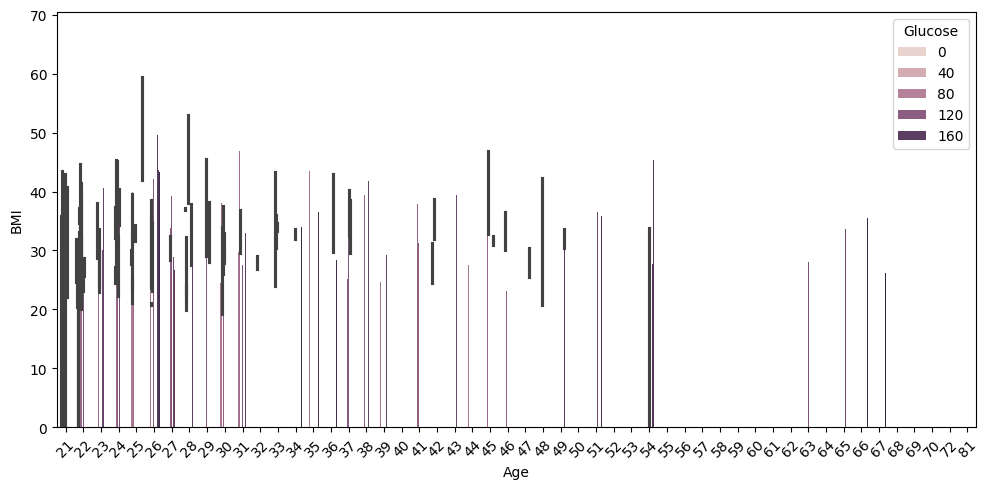

In [7]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)


sns.barplot(data = total_data_n, x = "Age", y = "BMI", hue = "Glucose")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

No sacamos nada en claro de este gráfico.

#### 4.4 Análisis de correlaciones

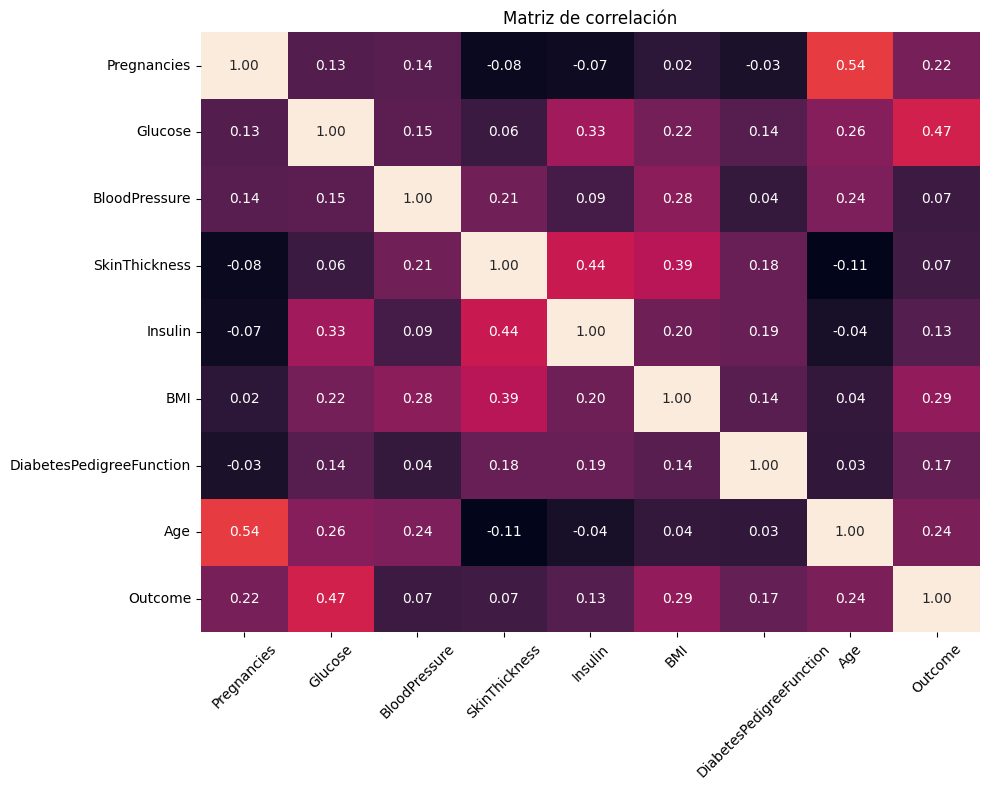

In [8]:
fig, axis = plt.subplots(figsize = (10, 8))

sns.heatmap(total_data_n[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(),cbar = False, annot = True, fmt = ".2f")
plt.title("Matriz de correlación")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

En este mapa de calor de todas las variables hay varias correlaciones a tener en cuenta:
- ***Age/Pregnancies*** teniendo una correlación de 0.54.
- ***Outcome/Glucose*** teniendo un 0.47.
- ***Insuline/SkinThickness*** con un 0.44.

Estos tres valores de correlación son los que más he destacado porque superan el 0.40, aunque también hay varios por debajo de este valor que ya se han nombrado anteriormente.


A continuación vamos a graficar el Pairplot:

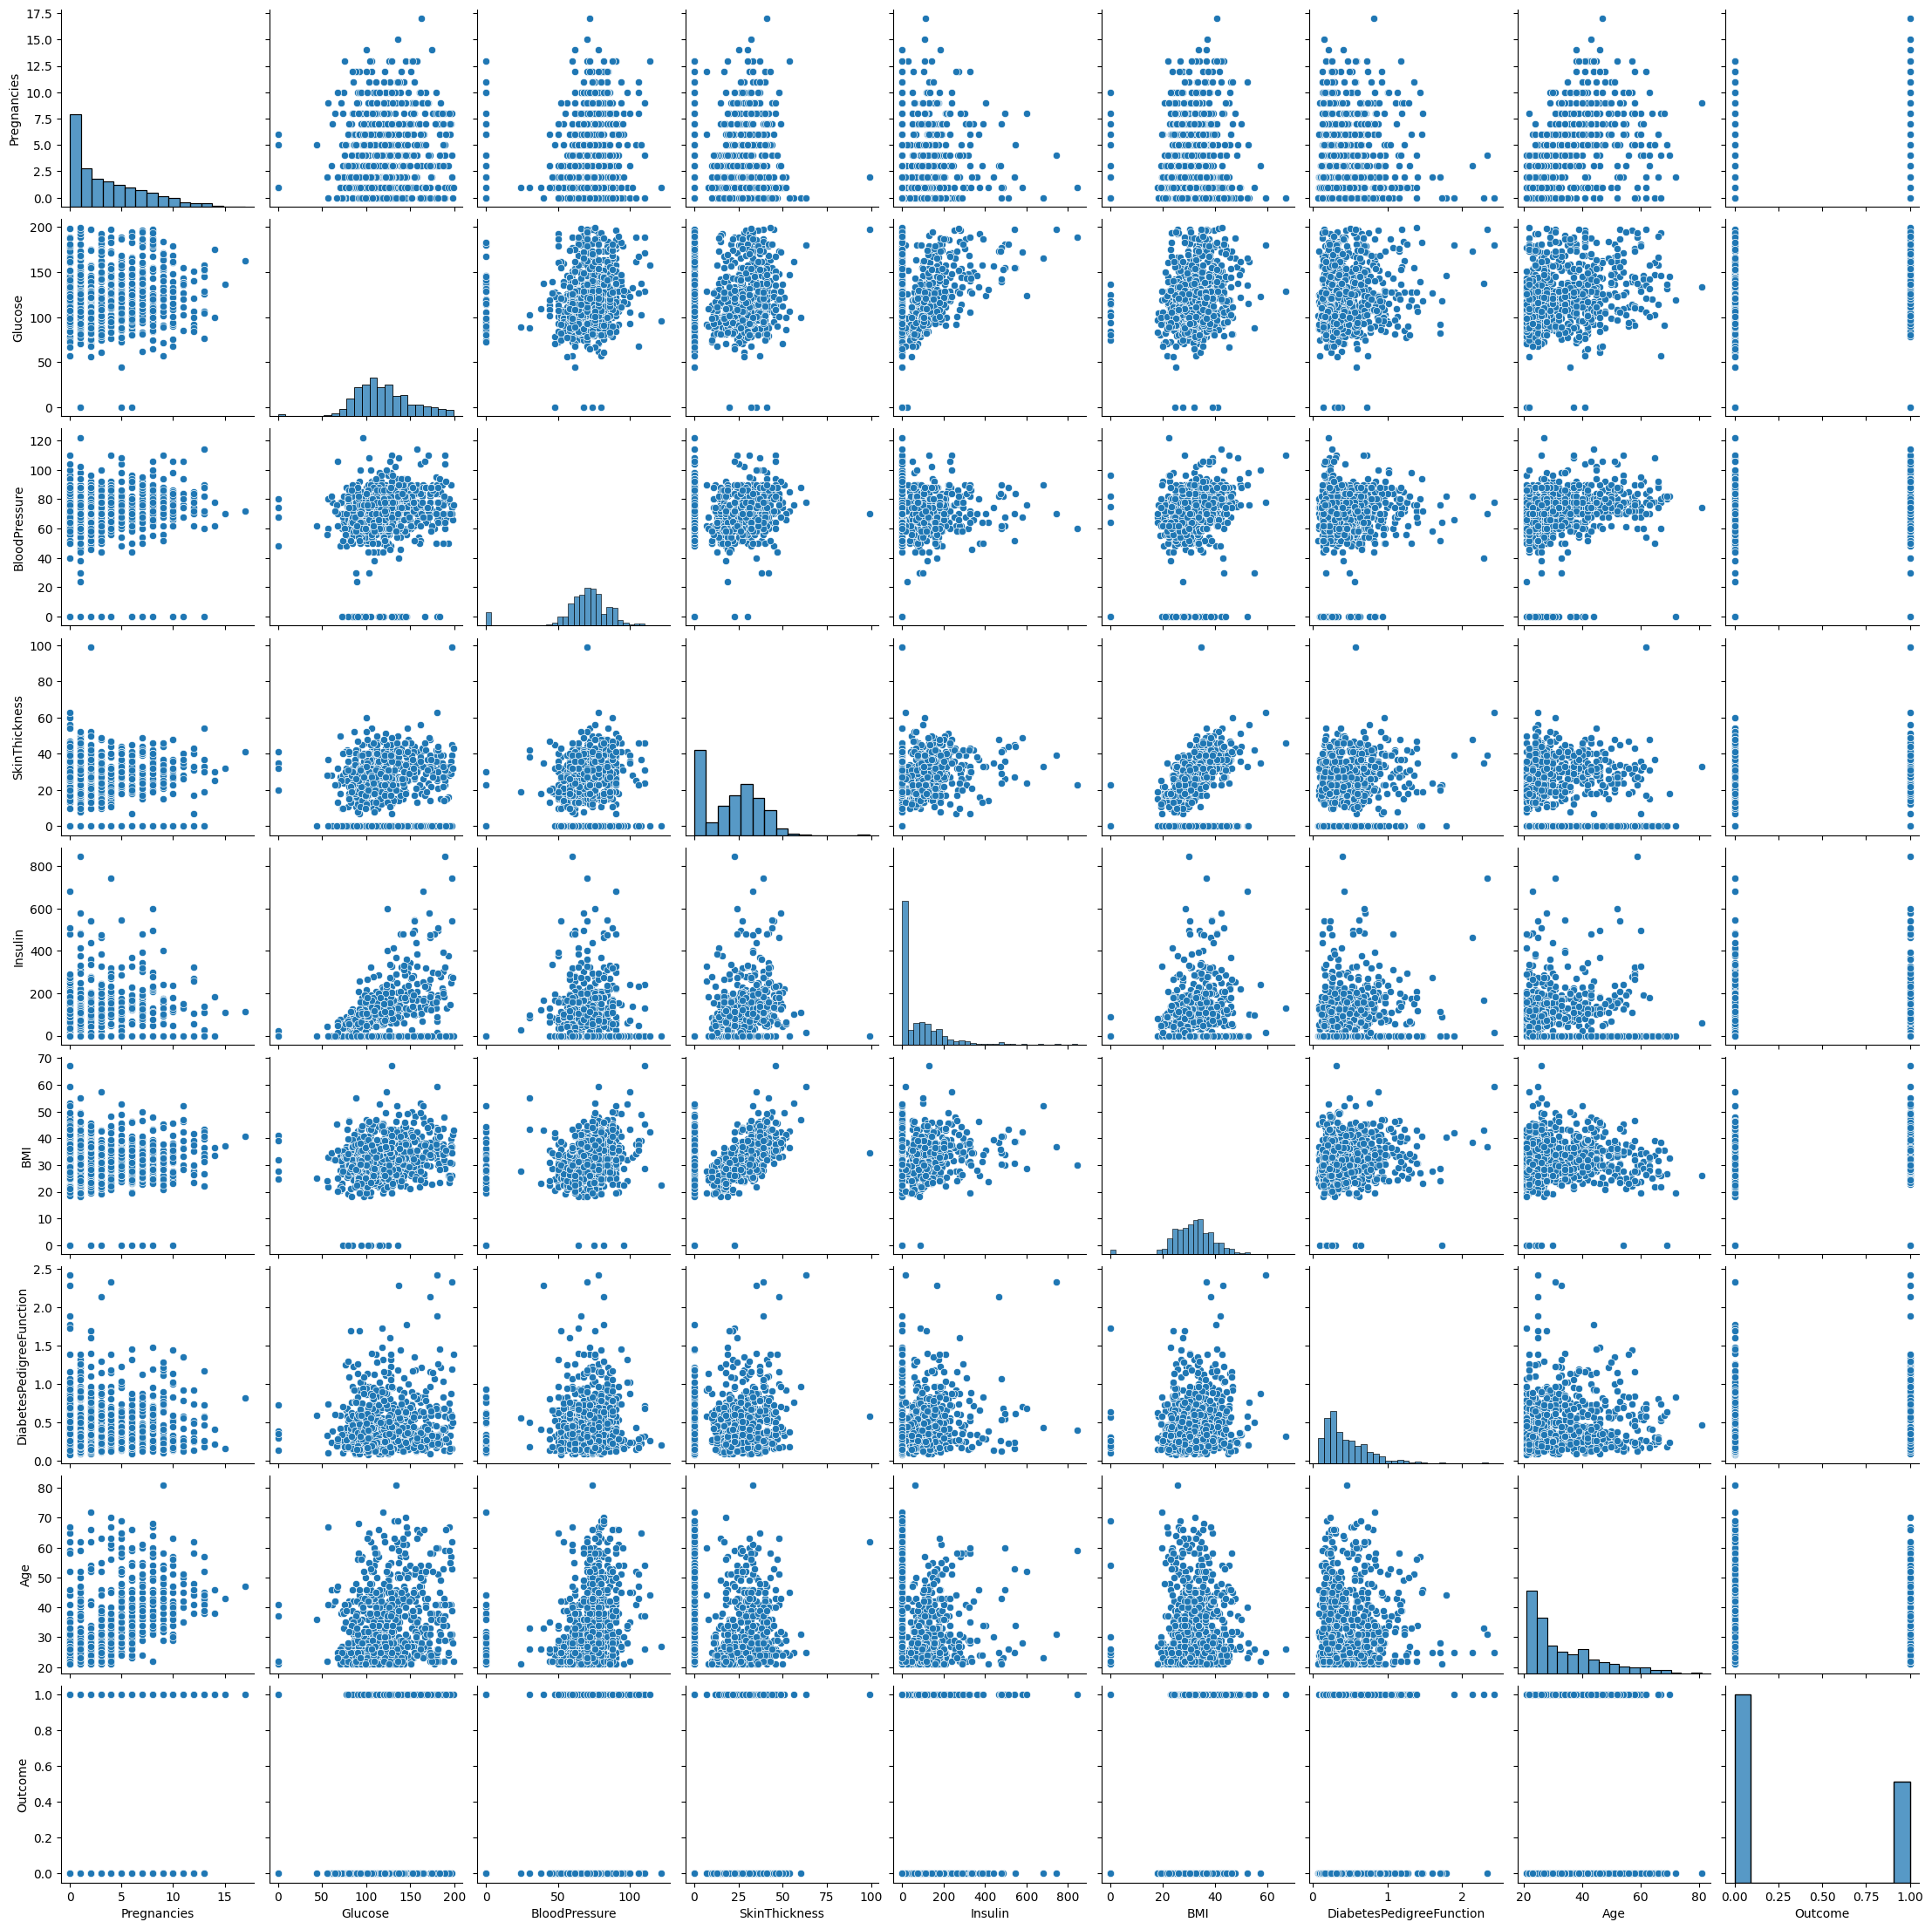

In [9]:
sns.pairplot( data = total_data)

### 5. Ingeniería de características

#### 5.1 Valores atípicos

In [10]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Vamos a rescatar los Boxplot con Outliers graficados previamente, que son todos menos de nuestra Target:

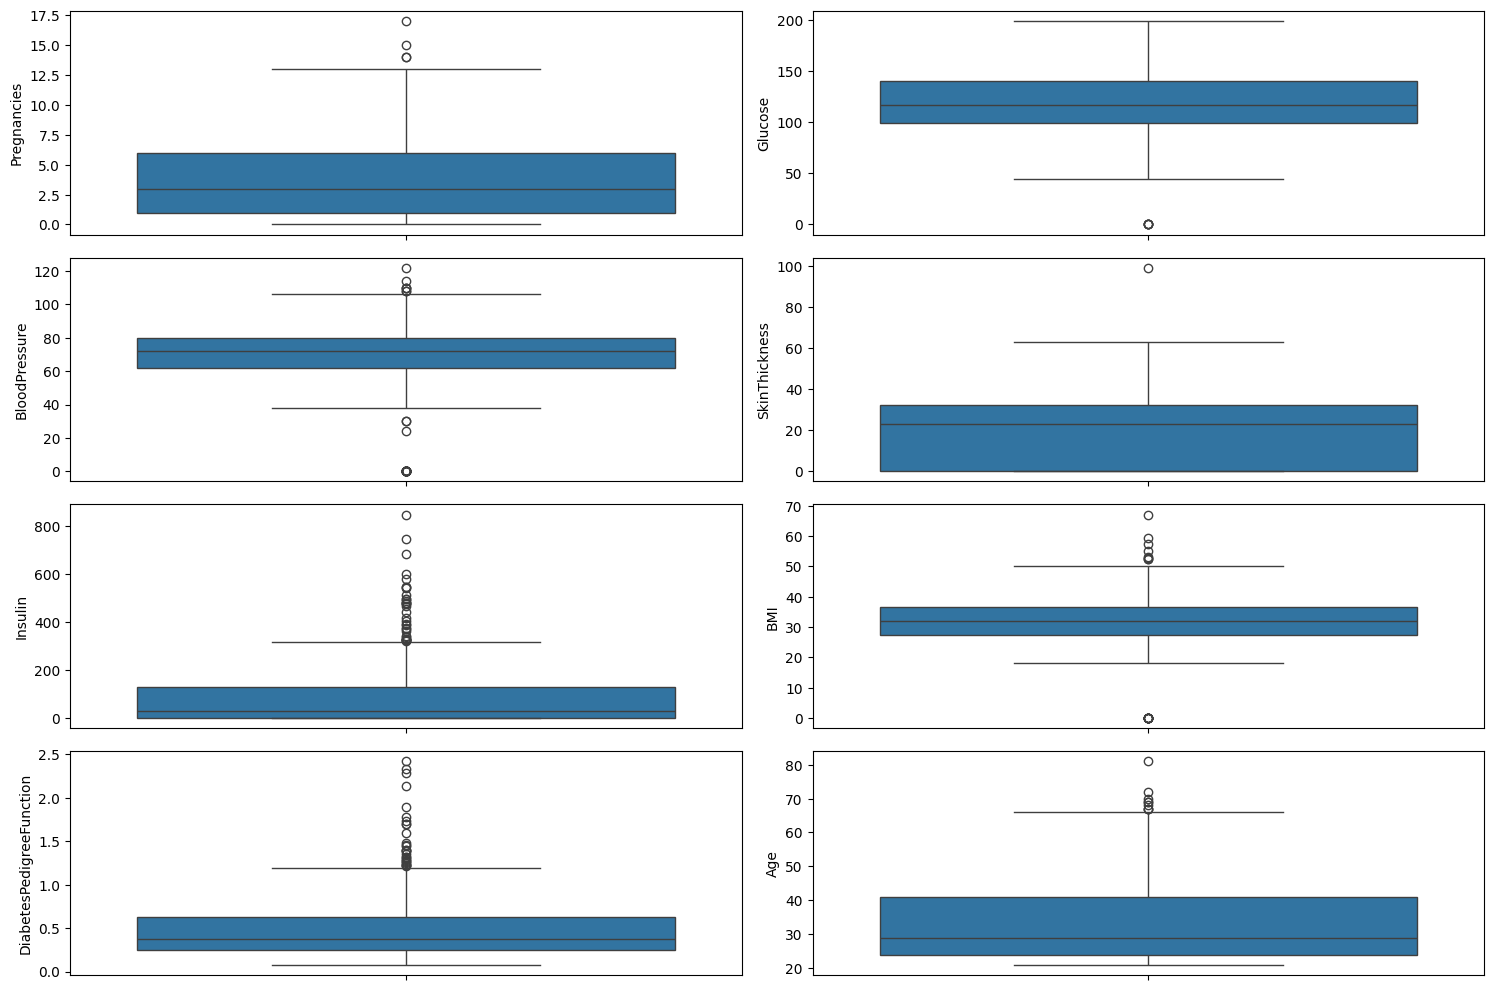

In [11]:
fig, axis = plt.subplots(4, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Glucose")
sns.boxplot(ax = axis[1,0], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "SkinThickness")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "Insulin")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "BMI")
sns.boxplot(ax = axis[3,0], data = total_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[3, 1], data = total_data, y = "Age")


plt.tight_layout()

plt.show()

In [12]:
total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["Insulin", "DiabetesPedigreeFunction", "Age", "BloodPressure", "BMI","SkinThickness", "Pregnancies", "Glucose"] :
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'Insulin': [0, np.float64(318.125)],
 'DiabetesPedigreeFunction': [0.078, np.float64(1.2)],
 'Age': [21, np.float64(66.5)],
 'BloodPressure': [np.float64(35.0), np.float64(107.0)],
 'BMI': [np.float64(13.35), np.float64(50.550000000000004)],
 'SkinThickness': [0, np.float64(80.0)],
 'Pregnancies': [0, np.float64(13.5)],
 'Glucose': [np.float64(37.125), np.float64(202.125)]}

In [13]:
total_data_CON_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
total_data_SIN_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


#### 5.2 Análisis de valores faltantes

In [15]:
total_data_CON_outliers.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Se observa que no se encuentra ningún valor nulo.

### 6. Escalado de valores

In [17]:
from sklearn.model_selection import train_test_split

num_variables = ["Insulin", "DiabetesPedigreeFunction", "Age", "BloodPressure", "BMI","SkinThickness", "Pregnancies", "Glucose"]

X_CON = total_data_CON_outliers.drop("Outcome", axis = 1)[num_variables]
y = total_data_CON_outliers["Outcome"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = total_data_SIN_outliers.drop("Outcome", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,Insulin,DiabetesPedigreeFunction,Age,BloodPressure,BMI,SkinThickness,Pregnancies,Glucose
60,0,0.304,21,0,0.0,0,2,84
618,0,1.282,50,82,28.2,24,9,112
346,83,0.654,22,46,28.7,19,1,139
294,0,0.254,65,50,21.9,0,0,161
231,370,0.238,46,80,46.2,37,6,134


#### 6.1 Normalización

In [18]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,Insulin,DiabetesPedigreeFunction,Age,BloodPressure,BMI,SkinThickness,Pregnancies,Glucose
60,-0.701206,-0.490735,-1.035940,-3.752683,-4.135256,-1.322774,-0.526397,-1.151398
618,-0.701206,2.415030,1.487101,0.680345,-0.489169,0.233505,1.588046,-0.276643
346,0.013448,0.549161,-0.948939,-1.265862,-0.424522,-0.090720,-0.828460,0.566871
294,-0.701206,-0.639291,2.792122,-1.049617,-1.303720,-1.322774,-1.130523,1.254179
231,2.484601,-0.686829,1.139095,0.572222,1.838121,1.076490,0.681856,0.410665


#### 6.2 Escalado Min-Max

In [19]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

#del X_train_con_outliers_scal

,Insulin,DiabetesPedigreeFunction,Age,BloodPressure,BMI,SkinThickness,Pregnancies,Glucose
60,0.000000,0.096499,0.000000,0.000000,0.000000,0.000000,0.117647,0.422111
618,0.000000,0.514091,0.483333,0.672131,0.420268,0.380952,0.529412,0.562814
346,0.098109,0.245944,0.016667,0.377049,0.427720,0.301587,0.058824,0.698492
294,0.000000,0.075149,0.733333,0.409836,0.326379,0.000000,0.000000,0.809045
231,0.437352,0.068318,0.416667,0.655738,0.688525,0.587302,0.352941,0.673367


In [25]:
from sklearn.feature_selection import f_classif, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

def best_k(x_train, y_train):
    scores = []    
    
    for k in range(1, x_train.shape[1] + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_new = selector.fit_transform(x_train, y_train)
        # Modelo simple para comparar (usa el que prefieras)
        model = LinearRegression()
        cv_score = cross_val_score(model, X_new, y_train, cv=5, scoring='r2').mean()
        scores.append(cv_score)
    # Mostrar el k con mejor score
    best_k = np.argmax(scores) + 1
    return best_k
k = best_k(X_train_sin_outliers_scal, y_train)
print (k)

selection_model = SelectKBest(f_classif, k = k)
selection_model.fit(X_train_con_outliers, y_train)
ix = selection_model.get_support()
X_train_con_outliers_k = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_con_outliers_k = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

X_train_con_outliers_k.head()

7


,Insulin,DiabetesPedigreeFunction,Age,BloodPressure,BMI,Pregnancies,Glucose
0,0.0,0.304,21.0,0.0,0.0,2.0,84.0
1,0.0,1.282,50.0,82.0,28.2,9.0,112.0
2,83.0,0.654,22.0,46.0,28.7,1.0,139.0
3,0.0,0.254,65.0,50.0,21.9,0.0,161.0
4,370.0,0.238,46.0,80.0,46.2,6.0,134.0


La función decide eliminar la variable "SkinThickness" del Dataset CON Outliers.

In [26]:
selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_sin_outliers, y_train)
ix = selection_model.get_support()
X_train_sin_outliers_k = pd.DataFrame(selection_model.transform(X_train_sin_outliers), columns = X_train_sin_outliers.columns.values[ix])
X_test_sin_outliers_k = pd.DataFrame(selection_model.transform(X_test_sin_outliers), columns = X_test_sin_outliers.columns.values[ix])
X_train_sin_outliers_k.head()

,Age,BMI,Pregnancies,Glucose
0,21.0,13.35,2.0,84.0
1,50.0,28.20,9.0,112.0
2,22.0,28.70,1.0,139.0
3,65.0,21.90,0.0,161.0
4,46.0,46.20,6.0,134.0


Sin embargo, del Dataset SIN Outliers, se carga 4 variables. Quedandose "Age", "BMI", "Pregnancies" y "Glucose".

In [32]:
X_train_con_outliers_norm_k = X_train_con_outliers_norm[X_train_con_outliers_k.columns]
X_train_sin_outliers_norm_k = X_train_sin_outliers_norm[X_train_sin_outliers_k.columns]
X_test_con_outliers_norm_k = X_test_con_outliers_norm[X_test_con_outliers_k.columns]
X_test_sin_outliers_norm_k = X_test_sin_outliers_norm[X_test_sin_outliers_k.columns]
X_train_con_outliers_scal_k = X_train_con_outliers_scal[X_train_con_outliers_k.columns]
X_train_sin_outliers_scal_k = X_train_sin_outliers_scal[X_train_sin_outliers_k.columns]
X_test_con_outliers_scal_k = X_test_con_outliers_scal[X_test_con_outliers_k.columns]
X_test_sin_outliers_scal_k = X_test_sin_outliers_scal[X_test_sin_outliers_k.columns]

In [33]:
selection_model.fit(X_train_sin_outliers, y_train)

ix = selection_model.get_support()
X_train_sin_outliers_k = pd.DataFrame(selection_model.transform(X_train_sin_outliers), columns = X_train_sin_outliers.columns.values[ix])
X_test_sin_outliers_k = pd.DataFrame(selection_model.transform(X_test_sin_outliers), columns = X_test_sin_outliers.columns.values[ix])

X_train_sin_outliers_k.head()

,Age,BMI,Pregnancies,Glucose
0,21.0,13.35,2.0,84.0
1,50.0,28.20,9.0,112.0
2,22.0,28.70,1.0,139.0
3,65.0,21.90,0.0,161.0
4,46.0,46.20,6.0,134.0


In [35]:
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_train_con_outliers_norm_k.to_excel("../data/processed/X_train_con_outliers_norm_k.xlsx", index = False)
X_train_sin_outliers_norm_k.to_excel("../data/processed/X_train_sin_outliers_norm_k.xlsx", index = False)
X_train_con_outliers_scal_k.to_excel("../data/processed/X_train_sin_outliers_scal_k.xlsx", index = False)
X_train_sin_outliers_scal_k.to_excel("../data/processed/X_train_sin_outliers_scal_k.xlsx", index = False)

X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)
X_test_con_outliers_norm_k.to_excel("../data/processed/X_test_con_outliers_norm_k.xlsx", index = False)
X_test_sin_outliers_norm_k.to_excel("../data/processed/X_test_sin_outliers_norm_k.xlsx", index = False)
X_test_con_outliers_scal_k.to_excel("../data/processed/X_train_sin_outliers_scal_k.xlsx", index = False)
X_test_sin_outliers_scal_k.to_excel("../data/processed/X_train_sin_outliers_scal_k.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

### 7. Machine Learning

#### 7.1 Árbol de decisión

Aunque no era necesario Normalizar ni Escalar para este tipo de modelo, se ha llevado a cabo igualmente.

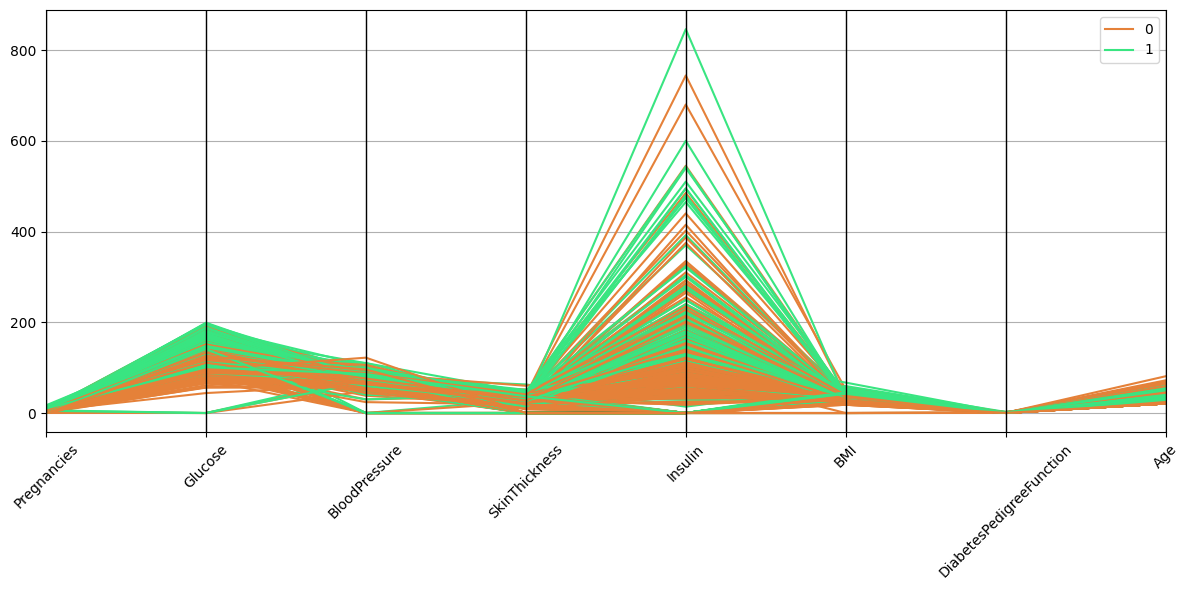

In [41]:
plt.figure(figsize=(12, 6))

columns = [
    "Pregnancies",  
    "Glucose", 
    "BloodPressure", 
    "SkinThickness", 
    "Insulin",  
    "BMI", 
    "DiabetesPedigreeFunction", 
    "Age"
]

total_data = pd.DataFrame(X_train_con_outliers, columns=columns)

total_data["Outcome"] = y_train

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

Graficando esto, podemos observar que la insulina afecta muy directamente al Outcome.

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracy_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_k,
    X_train_sin_outliers_k,
    X_train_con_outliers_norm_k,
    X_train_sin_outliers_norm_k,
    X_train_con_outliers_scal_k,
    X_train_sin_outliers_scal_k,
]:
    model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion="entropy",
    max_features=None,
    random_state=42
)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_results.append(accuracy_score(y_train, y_pred))

print("Accuracy:", accuracy_results)
print("Mejor Accuracy:", max(accuracy_results))

Accuracy: [0.8094462540716613, 0.8094462540716613, 0.8094462540716613, 0.8094462540716613, 0.8094462540716613, 0.8094462540716613, 0.8127035830618893, 0.8143322475570033, 0.8127035830618893, 0.8143322475570033, 0.8127035830618893, 0.8143322475570033]
Mejor Accuracy: 0.8143322475570033


Las variables SIN outliers y con las variables especificas seleccionadas por la función aplicada anteriormente son las que dan mejor accuracy, siendo especificamente el Dataset SIN Outliers. Es la que utilizaremos para predecir el modelo:

In [62]:
model = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=None,
    criterion="entropy",
    random_state=42
)
model.fit(X_train_sin_outliers_k, y_train)
y_pred_test = model.predict(X_test_sin_outliers_k)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.7727272727272727


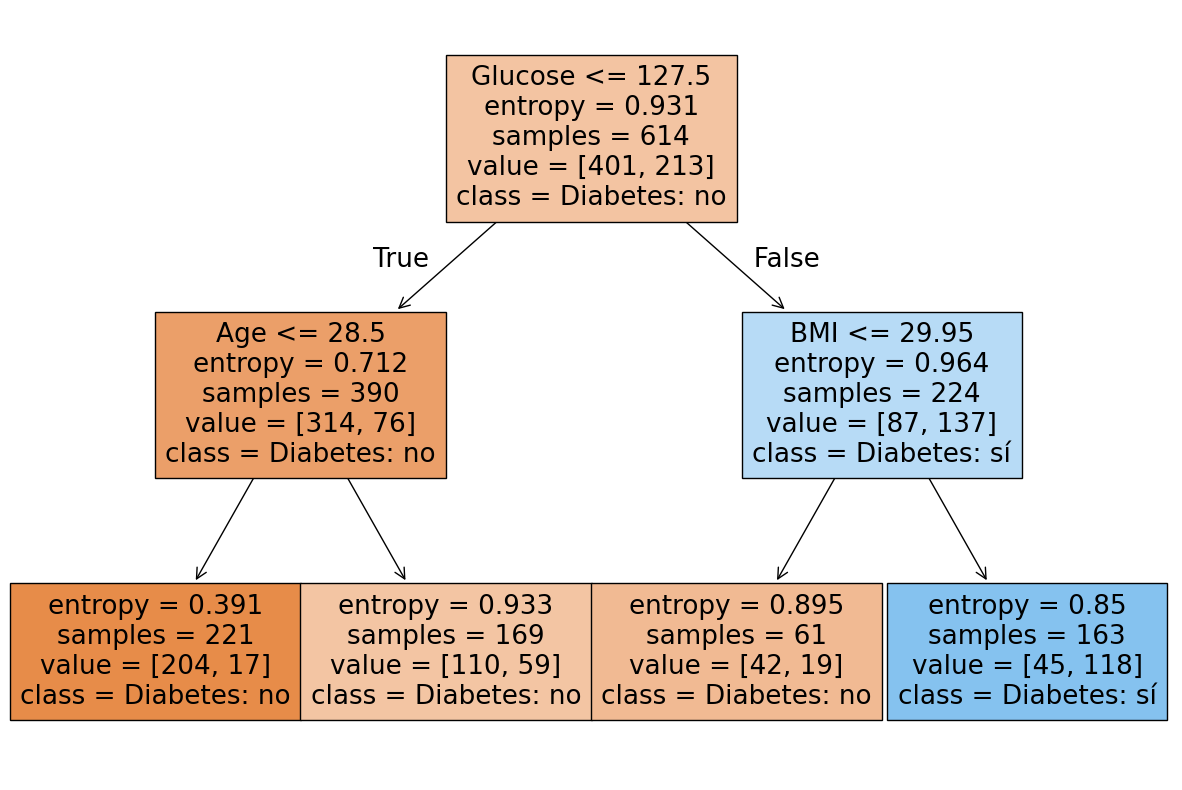

In [69]:
from sklearn import tree

arbol_decision = plt.figure(figsize=(15, 10))  

tree.plot_tree(
    model,
    feature_names=list(X_train_sin_outliers_k.columns),
    class_names=["Diabetes: no", "Diabetes: sí"],
    filled=True,
)

plt.show()

In [72]:
plt.savefig("arbol_decision.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

Guardamos el árbol en formato .png

In [73]:
from pickle import dump

dump(model, open("arbol_decision.sav", "wb"))

Y por último guardamos el modelo entrenado para poder usarlo en un futuro sin tener que volver a entrenarlo nuevamente.